In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/twitter_sentiment.csv')

In [3]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
print("Missing Values:\n", data.isnull().sum())
print("\nData Types:\n")
data.info()
print("\nSentiment Class Distribution:\n", data['Positive'].value_counts())

Missing Values:
 2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

Data Types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75681 entries, 0 to 75680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   75681 non-null  int64 
 1   Borderlands                                            75681 non-null  object
 2   Positive                                               75681 non-null  object
 3   im getting on borderlands and i will murder you all ,  74995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB

Sentiment Class Distribution:
 Positive
Negative      2

In [5]:
data = pd.read_csv('/content/twitter_sentiment.csv', header=None)
data.columns = ['tweet_id', 'entity', 'sentiment', 'text']

print("First few rows of the corrected DataFrame:")
print(data.head())

print("\nMissing Values after correction:", data.isnull().sum())
print("\nData Types after correction:")
data.info()
print("\nSentiment Class Distribution after correction:", data['sentiment'].value_counts())

First few rows of the corrected DataFrame:
   tweet_id       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  

Missing Values after correction: tweet_id       0
entity         0
sentiment      0
text         686
dtype: int64

Data Types after correction:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   75682 non-null  int64 
 1   entity     75682 non-nu

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

print("NLTK modules imported and data downloaded successfully.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


NLTK modules imported and data downloaded successfully.


In [7]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isna(text) or text is None: # Handle NaN or None values
        return ""
    text = str(text).lower()
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    return ' '.join(lemmatized_tokens)

# Apply the preprocessing function to the 'text' column
data['cleaned_text'] = data['text'].apply(preprocess_text)

print("First few rows of the DataFrame with original and cleaned text:")
print(data[['text', 'cleaned_text']].head())

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Added to resolve LookupError

print("NLTK modules imported and data downloaded successfully.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


NLTK modules imported and data downloaded successfully.


In [9]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isna(text) or text is None: # Handle NaN or None values
        return ""
    text = str(text).lower()
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    return ' '.join(lemmatized_tokens)

# Apply the preprocessing function to the 'text' column
data['cleaned_text'] = data['text'].apply(preprocess_text)

print("First few rows of the DataFrame with original and cleaned text:")
print(data[['text', 'cleaned_text']].head())

First few rows of the DataFrame with original and cleaned text:
                                                text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                     cleaned_text  
0    im getting borderland murder  
1              coming border kill  
2      im getting borderland kill  
3     im coming borderland murder  
4  im getting borderland 2 murder  


In [10]:
sentiment_mapping = {'Positive': 0, 'Negative': 1, 'Neutral': 2, 'Irrelevant': 3}
data['sentiment_label'] = data['sentiment'].map(sentiment_mapping)

print("First few rows with new sentiment labels:")
print(data[['sentiment', 'sentiment_label']].head())
print("\nSentiment label distribution:")
print(data['sentiment_label'].value_counts())

First few rows with new sentiment labels:
  sentiment  sentiment_label
0  Positive                0
1  Positive                0
2  Positive                0
3  Positive                0
4  Positive                0

Sentiment label distribution:
sentiment_label
1    22808
0    21109
2    18603
3    13162
Name: count, dtype: int64


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned_text'], data['sentiment_label'], test_size=0.2, random_state=42
)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limiting features to 5000 for manageability

# Fit TF-IDF Vectorizer on training data and transform both train and test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)
print("TF-IDF Vectorization complete.")

Shape of X_train_tfidf: (60545, 5000)
Shape of X_test_tfidf: (15137, 5000)
TF-IDF Vectorization complete.


In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Create a Tokenizer object and fit it on the training data's cleaned text
# This builds the vocabulary
# Handle potential NaN values by converting them to empty strings before fitting
tokenizer = Tokenizer(num_words=None, oov_token="<unk>") # num_words=None means keep all words
tokenizer.fit_on_texts(X_train.astype(str).tolist())

# Get the word index and vocabulary size
word_index = tokenizer.word_index
vocabulary_size = len(word_index) + 1 # +1 for the padding token (index 0)

print(f"Vocabulary size: {vocabulary_size}")
print("First 10 words in the vocabulary:")
for i, (word, idx) in enumerate(word_index.items()):
    if i >= 10:
        break
    print(f"  {word}: {idx}")

Vocabulary size: 26304
First 10 words in the vocabulary:
  <unk>: 1
  game: 2
  like: 3
  get: 4
  2: 5
  one: 6
  good: 7
  play: 8
  time: 9
  love: 10


In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Convert text to sequences of integers
X_train_sequences = tokenizer.texts_to_sequences(X_train.astype(str).tolist())
X_test_sequences = tokenizer.texts_to_sequences(X_test.astype(str).tolist())

# Determine an appropriate fixed length for padding
# Get the length of each sequence
train_sequence_lengths = [len(x) for x in X_train_sequences]
max_sequence_length = int(np.percentile(train_sequence_lengths, 95)) # Use 95th percentile to avoid extremely long sequences

print(f"Maximum sequence length for padding: {max_sequence_length}")

# Pad sequences to the fixed length
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

print("Shape of X_train_padded:", X_train_padded.shape)
print("Shape of X_test_padded:", X_test_padded.shape)
print("Text to sequence conversion and padding complete.")

Maximum sequence length for padding: 26
Shape of X_train_padded: (60545, 26)
Shape of X_test_padded: (15137, 26)
Text to sequence conversion and padding complete.


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np

print("Required modules imported successfully.")

Required modules imported successfully.



--- Logistic Regression Model ---


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.6741
Precision: 0.6736
Recall: 0.6741
F1-Score: 0.6705


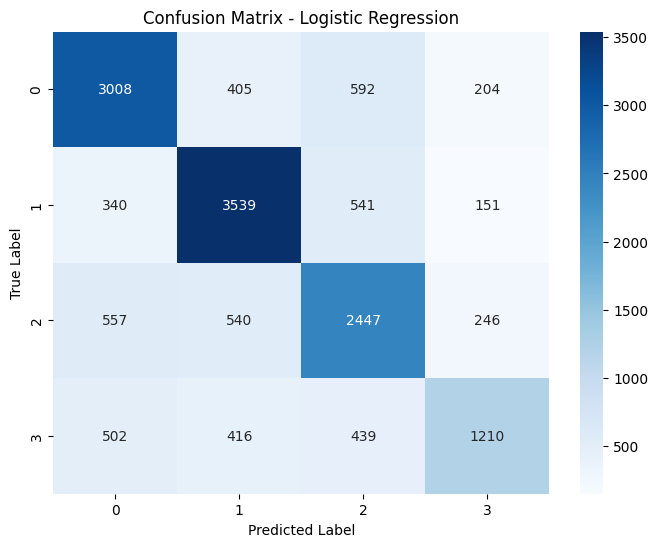

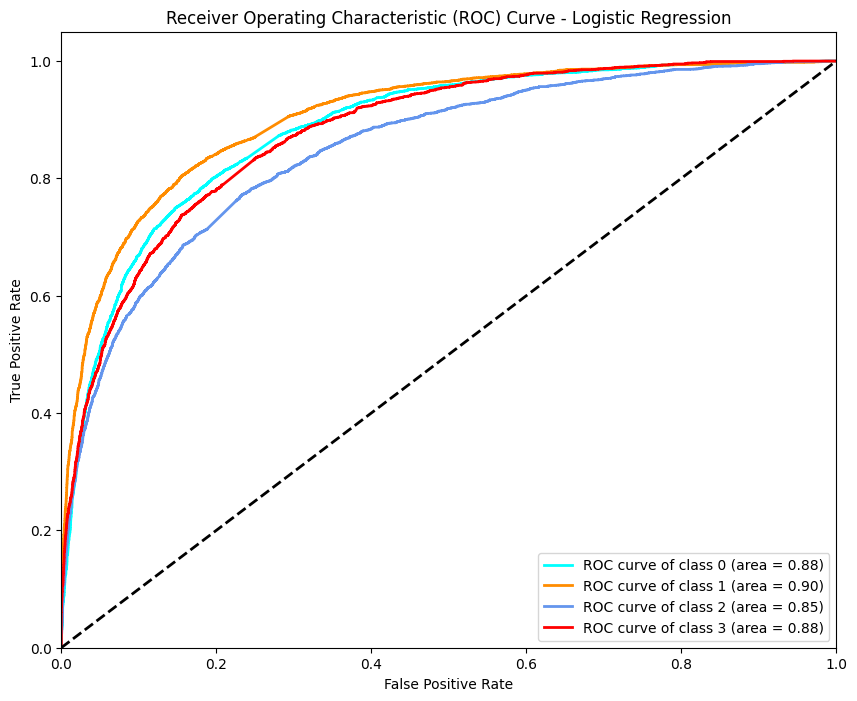

In [15]:
print("\n--- Logistic Regression Model ---")
# 1. Initialize Logistic Regression model
# Increased max_iter for convergence on larger datasets
log_reg = LogisticRegression(solver='liblinear', max_iter=2000, random_state=42, multi_class='ovr')

# 2. Train the model
log_reg.fit(X_train_tfidf, y_train)

# 3. Make predictions and calculate probabilities
y_pred_log_reg = log_reg.predict(X_test_tfidf)
y_prob_log_reg = log_reg.predict_proba(X_test_tfidf)

# 4. Calculate and print evaluation metrics
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted', zero_division=0)
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted', zero_division=0)
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-Score: {f1_log_reg:.4f}")

# 5. Generate and display the confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6. Generate and display the ROC curve
n_classes = len(log_reg.classes_)
y_test_binarized = label_binarize(y_test, classes=log_reg.classes_)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob_log_reg[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(log_reg.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()



--- Logistic Regression Model ---


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.6741
Precision: 0.6736
Recall: 0.6741
F1-Score: 0.6705


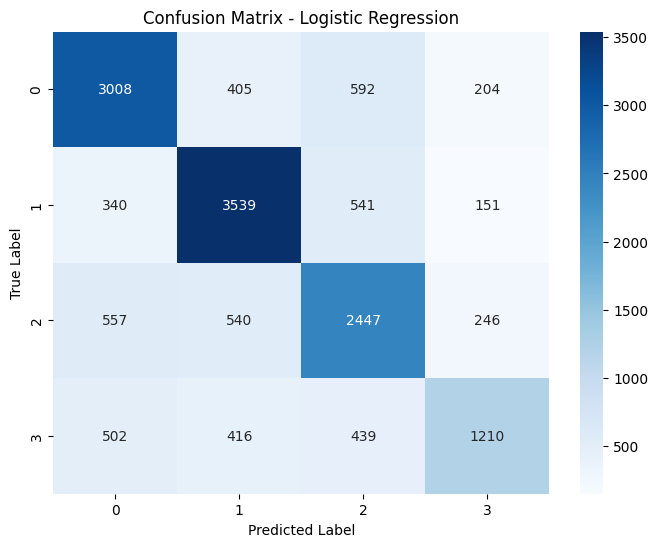

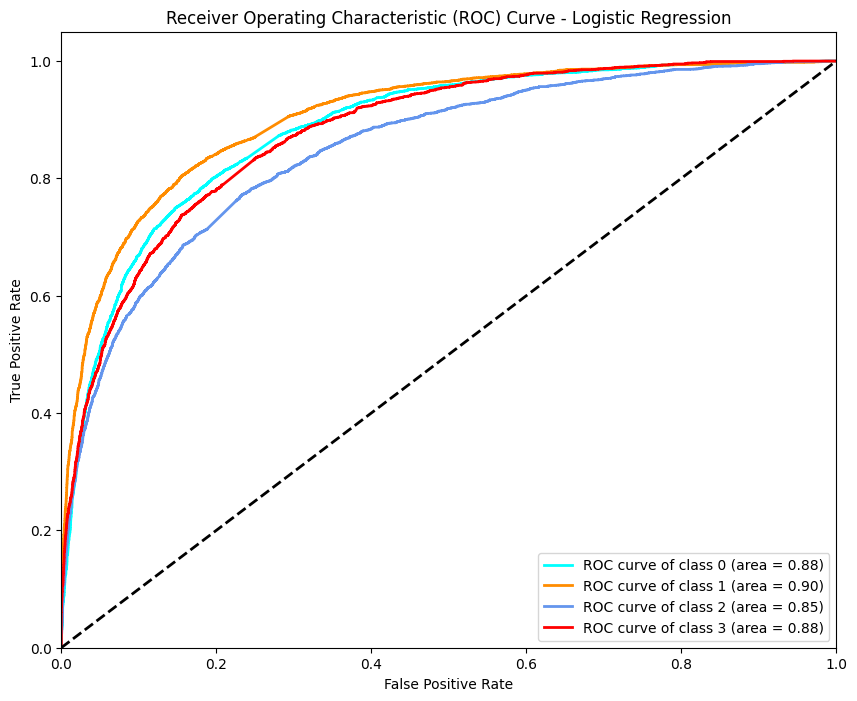


--- Support Vector Machine Model ---
Training SVC model... This might take a while.
SVC model training complete.
Accuracy: 0.7039
Precision: 0.7043
Recall: 0.7039
F1-Score: 0.7019


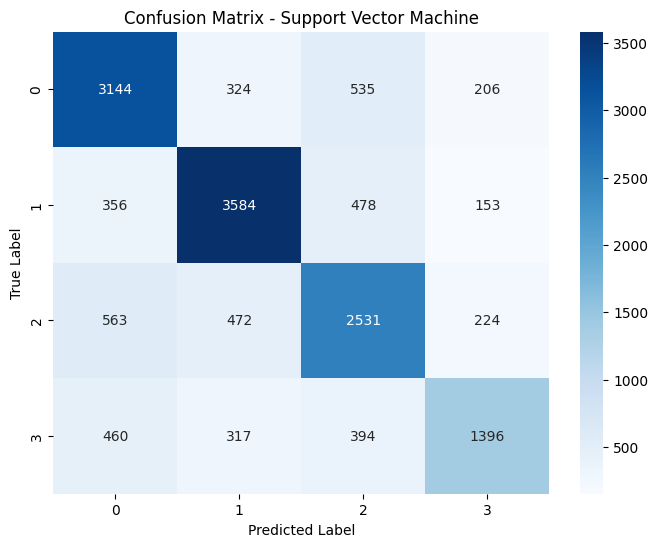

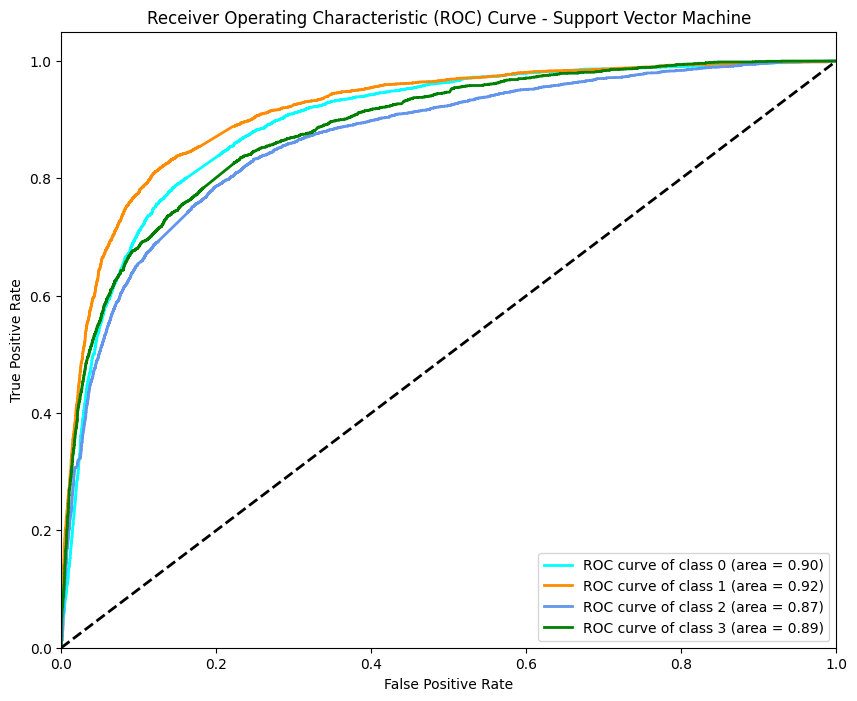

In [16]:
print("\n--- Logistic Regression Model ---")
# 1. Initialize Logistic Regression model
# Increased max_iter for convergence on larger datasets
log_reg = LogisticRegression(solver='liblinear', max_iter=2000, random_state=42, multi_class='ovr')

# 2. Train the model
log_reg.fit(X_train_tfidf, y_train)

# 3. Make predictions and calculate probabilities
y_pred_log_reg = log_reg.predict(X_test_tfidf)
y_prob_log_reg = log_reg.predict_proba(X_test_tfidf)

# 4. Calculate and print evaluation metrics
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted', zero_division=0)
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted', zero_division=0)
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-Score: {f1_log_reg:.4f}")

# 5. Generate and display the confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6. Generate and display the ROC curve
n_classes = len(log_reg.classes_)
y_test_binarized = label_binarize(y_test, classes=log_reg.classes_)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob_log_reg[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(log_reg.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

print("\n--- Support Vector Machine Model ---")
# 1. Initialize SVC model
# Using linear kernel for faster computation, and probability=True for ROC curve
# Reduced max_iter for initial test, might need adjustment
svc = SVC(kernel='linear', random_state=42, probability=True)

# 2. Train the model
# Note: SVC training can be very slow on large datasets
print("Training SVC model... This might take a while.")
svc.fit(X_train_tfidf, y_train)
print("SVC model training complete.")

# 3. Make predictions and calculate probabilities
y_pred_svc = svc.predict(X_test_tfidf)
y_prob_svc = svc.predict_proba(X_test_tfidf)

# 4. Calculate and print evaluation metrics
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc, average='weighted', zero_division=0)
recall_svc = recall_score(y_test, y_pred_svc, average='weighted', zero_division=0)
f1_svc = f1_score(y_test, y_pred_svc, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy_svc:.4f}")
print(f"Precision: {precision_svc:.4f}")
print(f"Recall: {recall_svc:.4f}")
print(f"F1-Score: {f1_svc:.4f}")

# 5. Generate and display the confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues',
            xticklabels=svc.classes_, yticklabels=svc.classes_)
plt.title('Confusion Matrix - Support Vector Machine')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6. Generate and display the ROC curve
n_classes = len(svc.classes_)
y_test_binarized = label_binarize(y_test, classes=svc.classes_)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob_svc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(svc.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Support Vector Machine')
plt.legend(loc="lower right")
plt.show()


--- Naive Bayes Model ---
Accuracy: 0.6347
Precision: 0.6430
Recall: 0.6347
F1-Score: 0.6230


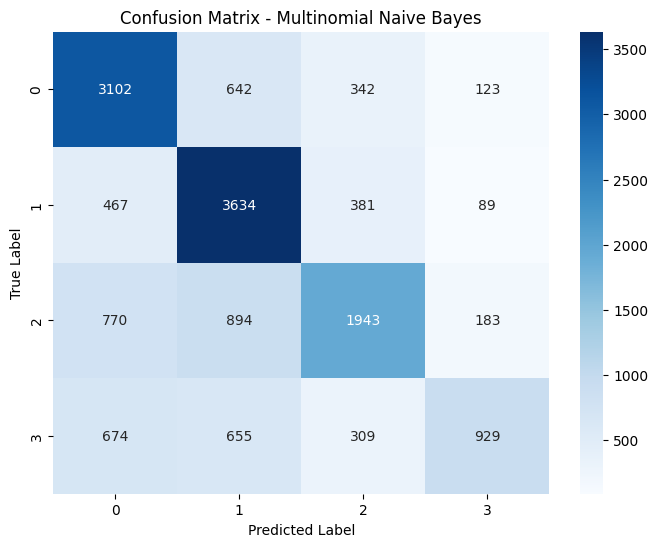

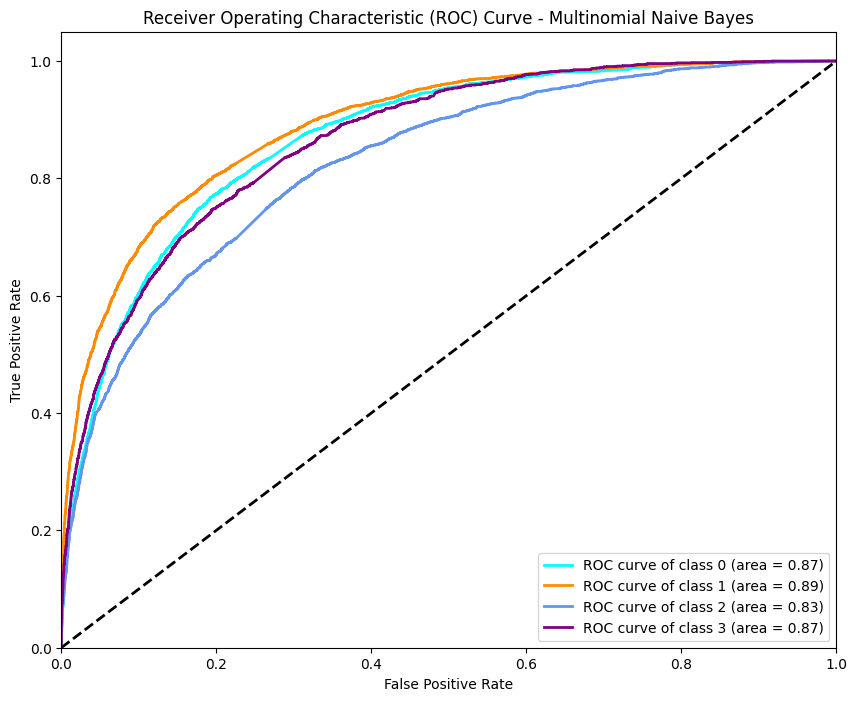

In [17]:
print("\n--- Naive Bayes Model ---")
# 1. Initialize Multinomial Naive Bayes model
mnb = MultinomialNB()

# 2. Train the model
mnb.fit(X_train_tfidf, y_train)

# 3. Make predictions and calculate probabilities
y_pred_mnb = mnb.predict(X_test_tfidf)
y_prob_mnb = mnb.predict_proba(X_test_tfidf)

# 4. Calculate and print evaluation metrics
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
precision_mnb = precision_score(y_test, y_pred_mnb, average='weighted', zero_division=0)
recall_mnb = recall_score(y_test, y_pred_mnb, average='weighted', zero_division=0)
f1_mnb = f1_score(y_test, y_pred_mnb, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy_mnb:.4f}")
print(f"Precision: {precision_mnb:.4f}")
print(f"Recall: {recall_mnb:.4f}")
print(f"F1-Score: {f1_mnb:.4f}")

# 5. Generate and display the confusion matrix
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=mnb.classes_, yticklabels=mnb.classes_)
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6. Generate and display the ROC curve
n_classes = len(mnb.classes_)
y_test_binarized = label_binarize(y_test, classes=mnb.classes_)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob_mnb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(mnb.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multinomial Naive Bayes')
plt.legend(loc="lower right")
plt.show()

In [18]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert padded sequences and labels to PyTorch tensors
X_train_tensor = torch.LongTensor(X_train_padded)
y_train_tensor = torch.LongTensor(y_train.values)
X_test_tensor = torch.LongTensor(X_test_padded)
y_test_tensor = torch.LongTensor(y_test.values)

# Create TensorDatasets
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

# Define batch size
batch_size = 64

# Create DataLoaders
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)

print("Data converted to PyTorch tensors and DataLoaders created successfully.")
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of testing batches: {len(test_loader)}")


Data converted to PyTorch tensors and DataLoaders created successfully.
Number of training batches: 947
Number of testing batches: 237


In [19]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    def __init__(self, vocabulary_size, embedding_dim, hidden_size, num_layers, num_classes, dropout_prob=0.5):
        super(SentimentLSTM, self).__init__()
        self.embedding = nn.Embedding(vocabulary_size, embedding_dim)
        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout_prob if num_layers > 1 else 0 # Apply dropout only if num_layers > 1
        )
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # x shape: (batch_size, sequence_length)
        embedded = self.embedding(x)
        # embedded shape: (batch_size, sequence_length, embedding_dim)

        lstm_out, (hidden, cell) = self.lstm(embedded)
        # lstm_out shape: (batch_size, sequence_length, hidden_size)
        # hidden shape: (num_layers, batch_size, hidden_size)

        # Take the output from the last time step of the last layer
        # Use the hidden state of the last LSTM layer for classification
        # hidden[-1, :, :] gets the last layer's hidden state for all batches
        out = self.dropout(hidden[-1, :, :])
        out = self.fc(out)
        # out shape: (batch_size, num_classes)
        return out

print("SentimentLSTM model class defined successfully.")

SentimentLSTM model class defined successfully.


In [20]:
import torch.optim as optim

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Hyperparameters for the LSTM model
embedding_dim = 128
hidden_size = 256
num_layers = 2
num_classes = len(data['sentiment'].unique()) # Number of unique sentiment classes

# Instantiate the model
model = SentimentLSTM(vocabulary_size, embedding_dim, hidden_size, num_layers, num_classes).to(device)

# Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Model instantiated, moved to device, and loss function/optimizer defined successfully.")
print(model)

Using device: cpu
Model instantiated, moved to device, and loss function/optimizer defined successfully.
SentimentLSTM(
  (embedding): Embedding(26304, 128)
  (lstm): LSTM(128, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=256, out_features=4, bias=True)
)


**Reasoning**:
Now that the model and training components are set up, I will implement the training and evaluation loops to train the LSTM model over several epochs, track its performance, and evaluate it on the test set.



In [21]:
num_epochs = 10

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train() # Set model to training mode
    total_train_loss = 0
    correct_train = 0
    total_train = 0

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad() # Clear gradients
        outputs = model(inputs) # Forward pass
        loss = criterion(outputs, labels) # Compute loss
        loss.backward() # Backward pass
        optimizer.step() # Update weights

        total_train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # Evaluation loop
    model.eval() # Set model to evaluation mode
    total_val_loss = 0
    correct_val = 0
    total_val = 0
    y_true_val = []
    y_pred_val = []
    y_prob_val = []

    with torch.no_grad(): # Disable gradient calculation for evaluation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            y_true_val.extend(labels.cpu().numpy())
            y_pred_val.extend(predicted.cpu().numpy())
            y_prob_val.extend(torch.nn.functional.softmax(outputs, dim=1).cpu().numpy())

    avg_val_loss = total_val_loss / len(test_loader)
    val_accuracy = 100 * correct_val / total_val
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], ' \
          f'Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, ' \
          f'Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.2f}%')

print("Training complete.")

Epoch [1/10], Train Loss: 1.2298, Train Acc: 44.40%, Val Loss: 1.0013, Val Acc: 59.83%
Epoch [2/10], Train Loss: 0.8324, Train Acc: 68.37%, Val Loss: 0.7432, Val Acc: 72.06%
Epoch [3/10], Train Loss: 0.5139, Train Acc: 81.55%, Val Loss: 0.5915, Val Acc: 78.81%
Epoch [4/10], Train Loss: 0.3314, Train Acc: 88.33%, Val Loss: 0.5462, Val Acc: 81.90%
Epoch [5/10], Train Loss: 0.2406, Train Acc: 91.46%, Val Loss: 0.5202, Val Acc: 82.56%
Epoch [6/10], Train Loss: 0.1978, Train Acc: 92.87%, Val Loss: 0.5434, Val Acc: 83.11%
Epoch [7/10], Train Loss: 0.1669, Train Acc: 93.78%, Val Loss: 0.5467, Val Acc: 84.18%
Epoch [8/10], Train Loss: 0.1421, Train Acc: 94.59%, Val Loss: 0.5822, Val Acc: 83.69%
Epoch [9/10], Train Loss: 0.1349, Train Acc: 94.78%, Val Loss: 0.5556, Val Acc: 84.51%
Epoch [10/10], Train Loss: 0.1240, Train Acc: 95.16%, Val Loss: 0.6186, Val Acc: 84.81%
Training complete.


In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Convert lists to numpy arrays for sklearn metrics
y_true_val_np = np.array(y_true_val)
y_pred_val_np = np.array(y_pred_val)

print("\n--- LSTM Model Evaluation on Test Set ---")
# Calculate and print evaluation metrics
accuracy_lstm = accuracy_score(y_true_val_np, y_pred_val_np)
precision_lstm = precision_score(y_true_val_np, y_pred_val_np, average='weighted', zero_division=0)
recall_lstm = recall_score(y_true_val_np, y_pred_val_np, average='weighted', zero_division=0)
f1_lstm = f1_score(y_true_val_np, y_pred_val_np, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy_lstm:.4f}")
print(f"Precision: {precision_lstm:.4f}")
print(f"Recall: {recall_lstm:.4f}")
print(f"F1-Score: {f1_lstm:.4f}")

# Optional: Detailed classification report
print("\nClassification Report:")
print(classification_report(y_true_val_np, y_pred_val_np, target_names=[str(k) for k in sentiment_mapping.keys()], zero_division=0))



--- LSTM Model Evaluation on Test Set ---
Accuracy: 0.8481
Precision: 0.8526
Recall: 0.8481
F1-Score: 0.8482

Classification Report:
              precision    recall  f1-score   support

    Positive       0.78      0.91      0.84      4209
    Negative       0.90      0.87      0.88      4571
     Neutral       0.89      0.79      0.83      3790
  Irrelevant       0.84      0.80      0.82      2567

    accuracy                           0.85     15137
   macro avg       0.85      0.84      0.84     15137
weighted avg       0.85      0.85      0.85     15137



**Reasoning**:
Now, I will generate and display the confusion matrix for the LSTM model's predictions on the test set to visualize the performance across different classes.



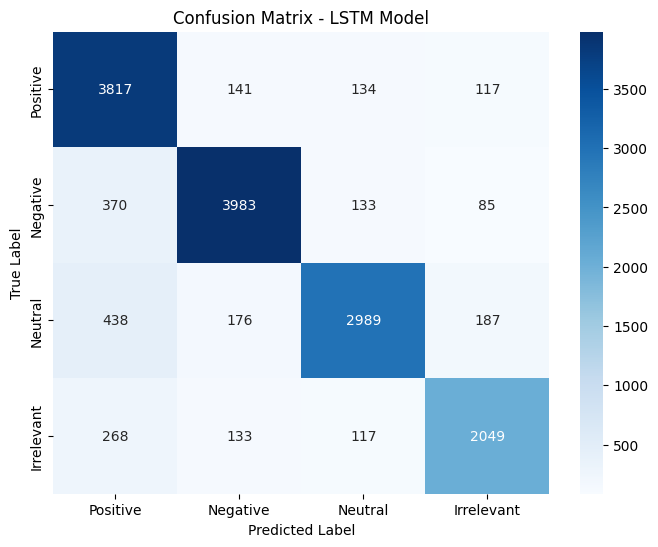

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate and display the confusion matrix for the LSTM model
cm_lstm = confusion_matrix(y_true_val_np, y_pred_val_np)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(k) for k in sentiment_mapping.keys()],
            yticklabels=[str(k) for k in sentiment_mapping.keys()])
plt.title('Confusion Matrix - LSTM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


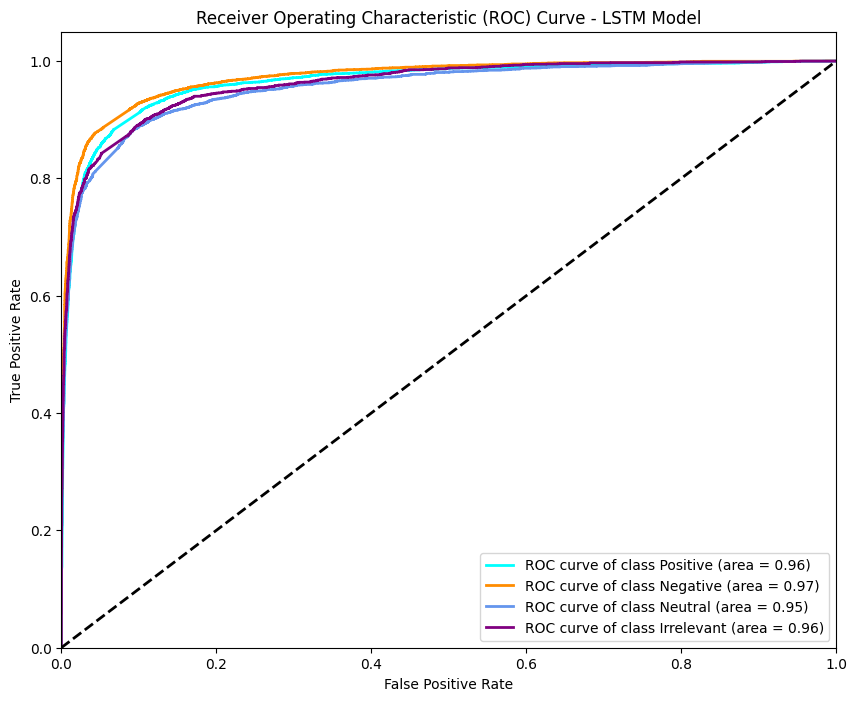

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np

# Get unique classes from the sentiment_mapping for consistent ordering
classes = [str(k) for k in sentiment_mapping.keys()]
n_classes = len(classes)

# Binarize the true labels for ROC curve calculation
y_test_binarized = label_binarize(y_true_val_np, classes=np.arange(n_classes))

# Convert y_prob_val to a NumPy array if it isn't already
y_prob_val_np = np.array(y_prob_val)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob_val_np[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - LSTM Model')
plt.legend(loc="lower right")
plt.show()

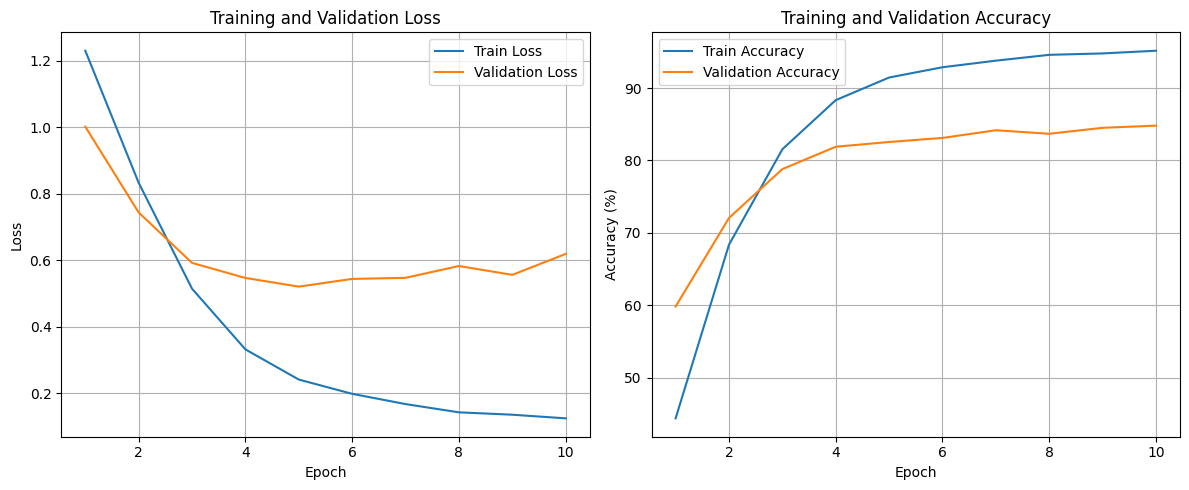

Loss and Accuracy curves plotted successfully.


In [25]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Loss and Accuracy curves plotted successfully.")

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

print("WordCloud and matplotlib imported successfully.")

WordCloud and matplotlib imported successfully.


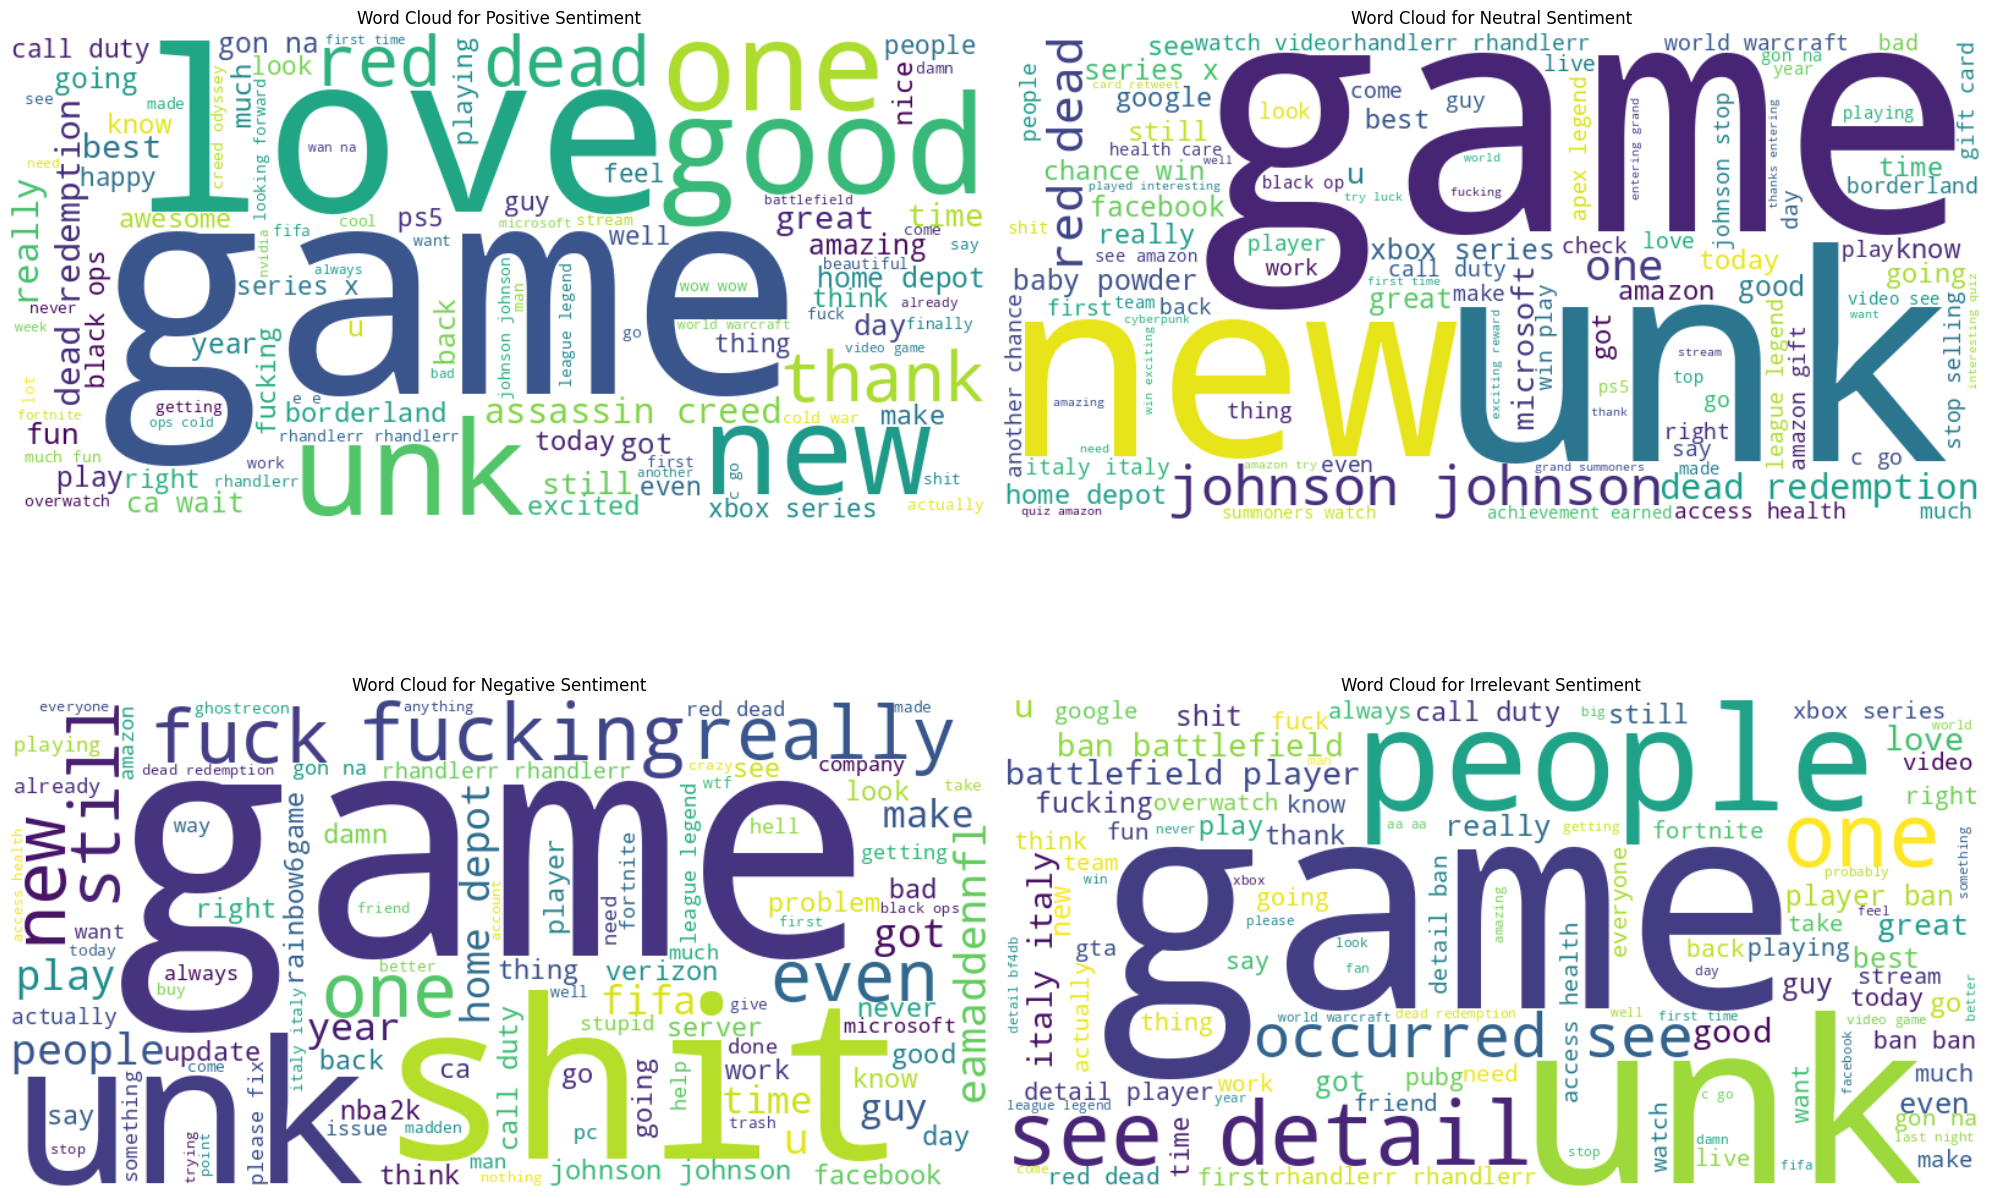

Word clouds for each sentiment class generated successfully.


In [27]:
sentiment_classes = data['sentiment'].unique()

plt.figure(figsize=(20, 15))

for i, sentiment in enumerate(sentiment_classes):
    # Filter data for the current sentiment class
    sentiment_data = data[data['sentiment'] == sentiment]
    # Concatenate all cleaned text for this sentiment
    all_words = ' '.join(sentiment_data['cleaned_text'].astype(str).tolist())

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap='viridis', max_words=100).generate(all_words)

    # Plotting the word cloud
    plt.subplot(2, 2, i + 1) # Adjust subplot grid based on number of sentiments
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')

plt.tight_layout()
plt.show()

print("Word clouds for each sentiment class generated successfully.")

/tmp/ipython-input-491021963.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tfidf_words.values, y=top_tfidf_words.index, palette='viridis')


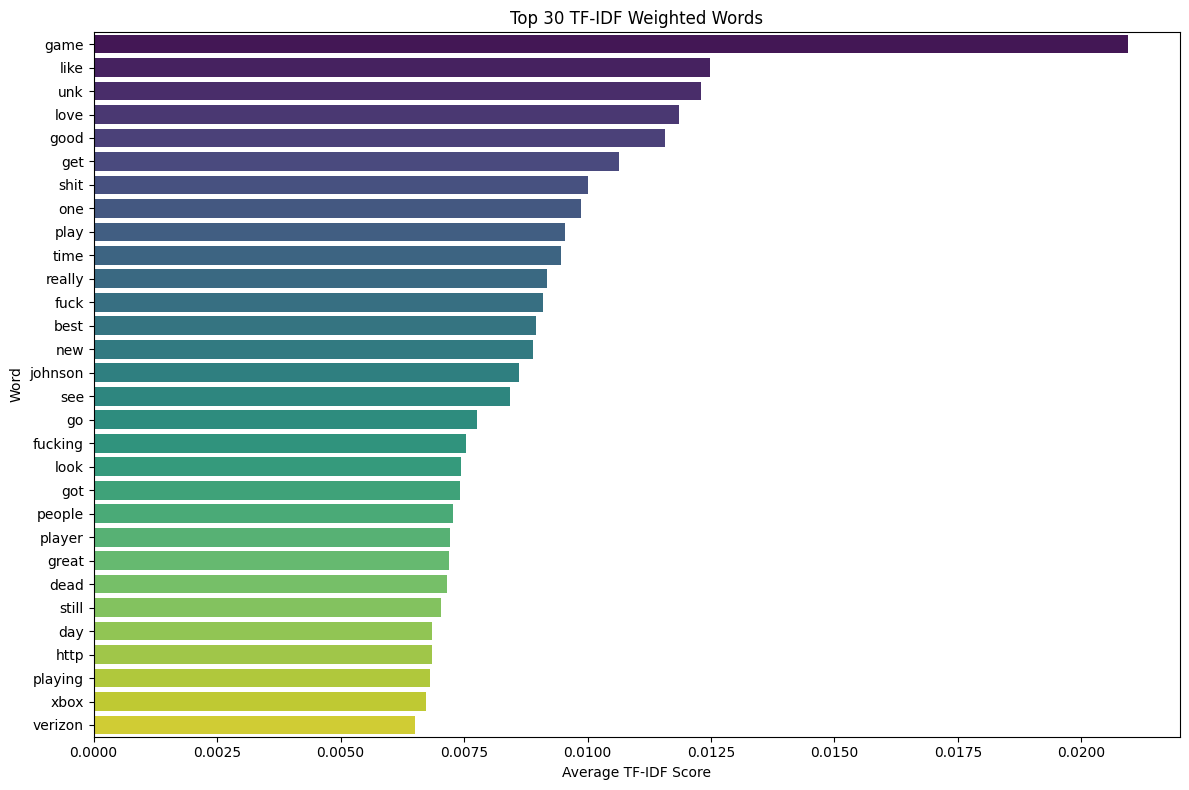

Top 30 TF-IDF weighted words visualized successfully.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names (words) from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Calculate the average TF-IDF score for each word across the training dataset
# X_train_tfidf is a sparse matrix, convert to dense for sum if necessary, or sum directly if possible
# For sparse matrices, summing along axis 0 and then dividing by number of documents is common
average_tfidf_scores = X_train_tfidf.mean(axis=0).A1 # .A1 converts to 1D numpy array

# Create a pandas Series of words and their average TF-IDF scores
tfidf_scores_series = pd.Series(average_tfidf_scores, index=feature_names)

# Sort the words by their TF-IDF scores in descending order and select the top N
top_n = 30 # Number of top words to visualize
top_tfidf_words = tfidf_scores_series.nlargest(top_n)

# Plotting the top TF-IDF words
plt.figure(figsize=(12, 8))
sns.barplot(x=top_tfidf_words.values, y=top_tfidf_words.index, palette='viridis')
plt.title(f'Top {top_n} TF-IDF Weighted Words')
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

print(f"Top {top_n} TF-IDF weighted words visualized successfully.")

**Reasoning**:
The previous code generated a `FutureWarning` from seaborn about the `palette` argument without a `hue` variable. I will update the `sns.barplot` call to explicitly set `hue` to the word index and `legend` to `False` to resolve this warning.



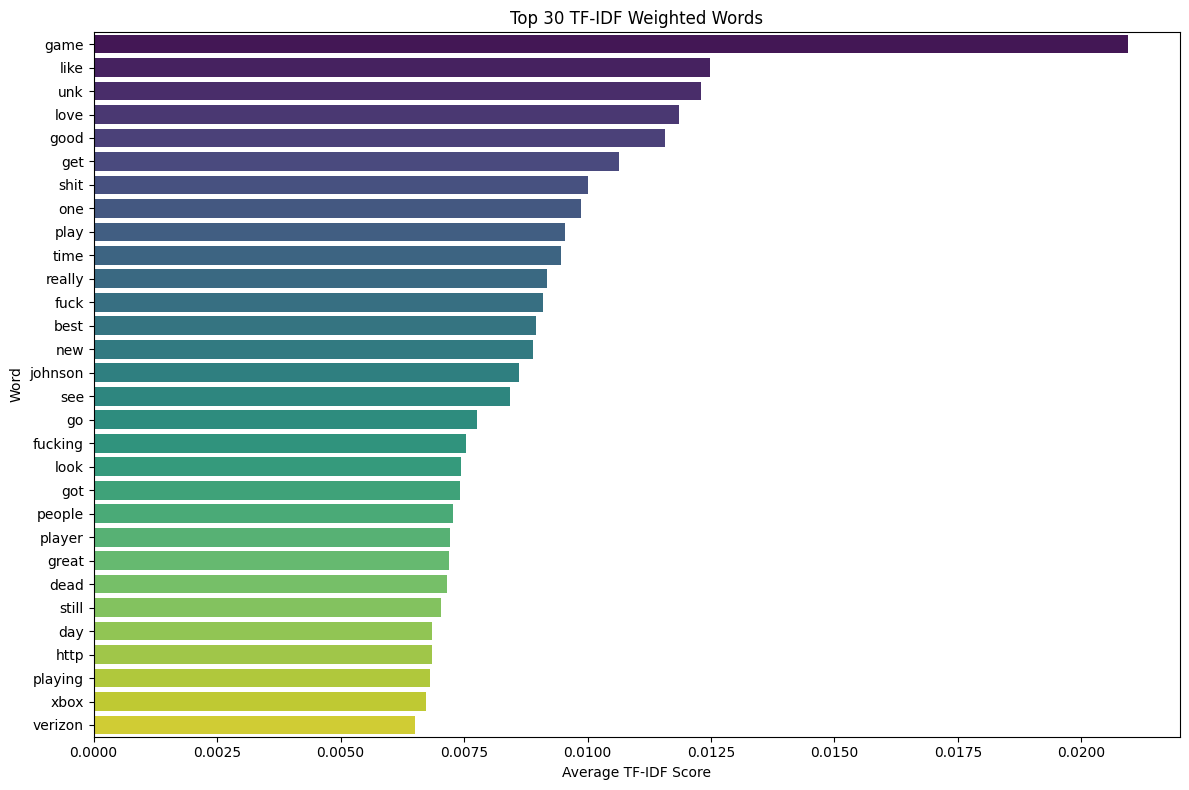

Top 30 TF-IDF weighted words visualized successfully.


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names (words) from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Calculate the average TF-IDF score for each word across the training dataset
# X_train_tfidf is a sparse matrix, convert to dense for sum if necessary, or sum directly if possible
# For sparse matrices, summing along axis 0 and then dividing by number of documents is common
average_tfidf_scores = X_train_tfidf.mean(axis=0).A1 # .A1 converts to 1D numpy array

# Create a pandas Series of words and their average TF-IDF scores
tfidf_scores_series = pd.Series(average_tfidf_scores, index=feature_names)

# Sort the words by their TF-IDF scores in descending order and select the top N
top_n = 30 # Number of top words to visualize
top_tfidf_words = tfidf_scores_series.nlargest(top_n)

# Plotting the top TF-IDF words
plt.figure(figsize=(12, 8))
sns.barplot(x=top_tfidf_words.values, y=top_tfidf_words.index, palette='viridis', hue=top_tfidf_words.index, legend=False)
plt.title(f'Top {top_n} TF-IDF Weighted Words')
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

print(f"Top {top_n} TF-IDF weighted words visualized successfully.")

**Reasoning**:
To visualize the embedding space, I need to import the necessary dimensionality reduction libraries, `PCA` and `TSNE`, from `sklearn`.



In [30]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

print("PCA and TSNE imported successfully.")

PCA and TSNE imported successfully.


Shape of raw word embeddings: (26304, 128)
Shape of selected embeddings for TSNE: (500, 128)


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


TSNE dimensionality reduction complete.


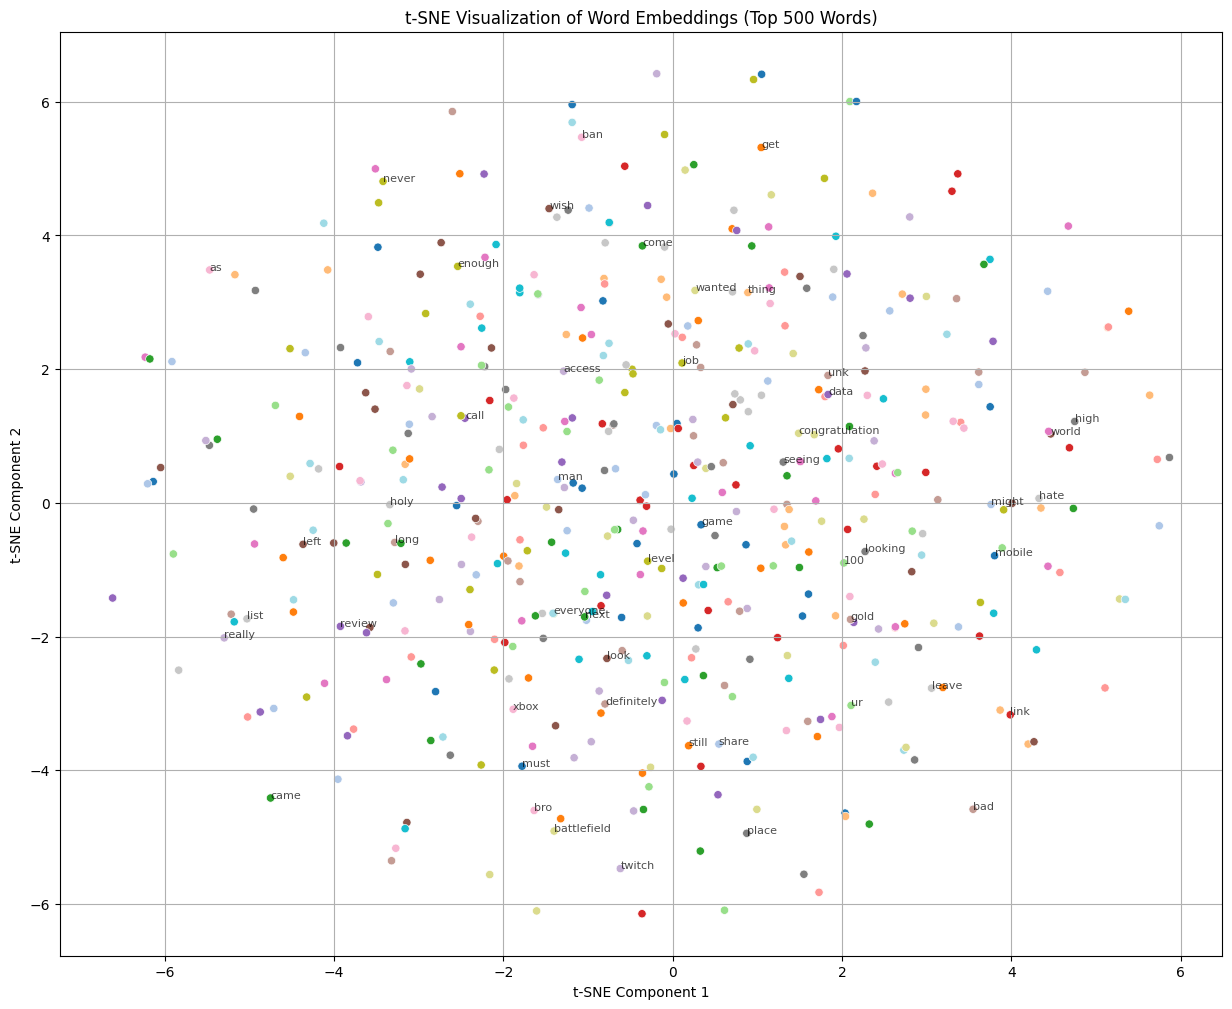

t-SNE visualization of word embeddings generated successfully.


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np

# 1. Retrieve word embeddings
# Move embeddings to CPU and convert to numpy array
word_embeddings = model.embedding.weight.data.cpu().numpy()
print(f"Shape of raw word embeddings: {word_embeddings.shape}")

# 2. Select a subset of embeddings for visualization (e.g., top 1000 most frequent words)
# The tokenizer's word_index is typically ordered by frequency.
# Let's consider words up to index 1000, excluding the padding (0) and <unk> (1) if present
# num_words_to_visualize = 1000
# Use all words for now, TSNE might take a while
# For performance, we can sample:

# Let's take the first 1000 words from the word_index for TSNE
# Exclude padding (0) and <unk> (1) if present in word_index, assuming word_index starts from 1 for <unk>
words_for_tsne = list(word_index.keys())[1:1001] # From <unk> (index 1) to the 1000th word
indices_for_tsne = [word_index[word] for word in words_for_tsne]

# Ensure indices are within the bounds of word_embeddings (which has vocabulary_size rows)
# Adjust indices to be 0-based if necessary, depending on how embedding layer was initialized
# The embedding layer automatically handles index 0 for padding. Our vocabulary_size is len(word_index) + 1
# If word_index starts from 1 (for <unk>), then actual embedding indices are 0 to len(word_index)
# If <unk> is index 1, then the word_index values are suitable for direct use with embedding layer outputs.
# Let's map word_index values to 0-based indexing for numpy array access
# The embedding layer usually maps word_index to embedding vector. So, if word 'game' is 2, it gets word_embeddings[2]
# We need to ensure we are taking the correct rows from word_embeddings

# Assuming word_index gives 1-based indexing for actual words, and 0 is reserved for padding.
# If word 'game' has index 2 in word_index, we access word_embeddings[2]
# So, the indices for TSNE are directly the values from word_index, up to a certain point.

selected_indices_for_tsne = []
selected_words = []

# Create a mapping from word to its index in word_index (1-based)
word_to_idx_map = {word: idx for word, idx in word_index.items()}

# Collect the actual indices and words for the top N most frequent words (excluding <unk> and padding)
# Assuming word_index is sorted by frequency (lower index = more frequent)
# We'll take words whose index in the tokenizer is between 2 and N+1 (inclusive) to skip <unk> and padding
num_words_to_visualize = 500
current_count = 0
for word, idx in word_index.items():
    if idx > 1 and current_count < num_words_to_visualize: # Exclude <unk> and padding (if any has index 0 or 1)
        selected_indices_for_tsne.append(idx)
        selected_words.append(word)
        current_count += 1
    if current_count >= num_words_to_visualize:
        break

# Select the actual embedding vectors using these indices
# Ensure the indices are valid for the word_embeddings array (which is 0-indexed and of size vocabulary_size)
# If `vocabulary_size` is `len(word_index) + 1`, and `word_index` starts from 1, then `word_embeddings[0]` is padding, `word_embeddings[1]` is <unk>, etc.
# So, `selected_indices_for_tsne` should directly correspond to rows in `word_embeddings`.

selected_embeddings = word_embeddings[selected_indices_for_tsne]
print(f"Shape of selected embeddings for TSNE: {selected_embeddings.shape}")

# 3. Apply TSNE for dimensionality reduction
# Perplexity should be less than the number of samples. Make sure it's valid.
perplexity_val = min(30, selected_embeddings.shape[0] - 1) # Default is 30, ensure it's not too large

tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_val, n_iter=2000)
reduced_embeddings = tsne.fit_transform(selected_embeddings)

print("TSNE dimensionality reduction complete.")

# 4. Create a scatter plot
plt.figure(figsize=(15, 12))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=selected_words, legend=False, palette='tab20')

# Annotate some words (e.g., top 50 or random subset for clarity)
num_annotations = 50 # Number of words to annotate
np.random.seed(42) # For reproducibility
annotation_indices = np.random.choice(len(selected_words), num_annotations, replace=False)

for i in annotation_indices:
    plt.annotate(selected_words[i], (reduced_embeddings[i, 0], reduced_embeddings[i, 1]),
                 fontsize=8, alpha=0.7)

plt.title(f't-SNE Visualization of Word Embeddings (Top {num_words_to_visualize} Words)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

print("t-SNE visualization of word embeddings generated successfully.")

In [38]:
# Save model weights
torch.save(model.state_dict(), "sentiment_model_weights.pth")
print("Model weights saved successfully.")

# If you need to save the entire model structure (not recommended for production):
# torch.save(model, "sentiment_full_model.pth")
# print("Full model saved.")

Model weights saved successfully.


**Reasoning**:
The previous code generated a `FutureWarning` because the `n_iter` parameter in `TSNE` was renamed to `max_iter`. I will update the `TSNE` constructor to use `max_iter` instead of `n_iter` to resolve this warning.



Shape of raw word embeddings: (26304, 128)
Shape of selected embeddings for TSNE: (500, 128)
TSNE dimensionality reduction complete.


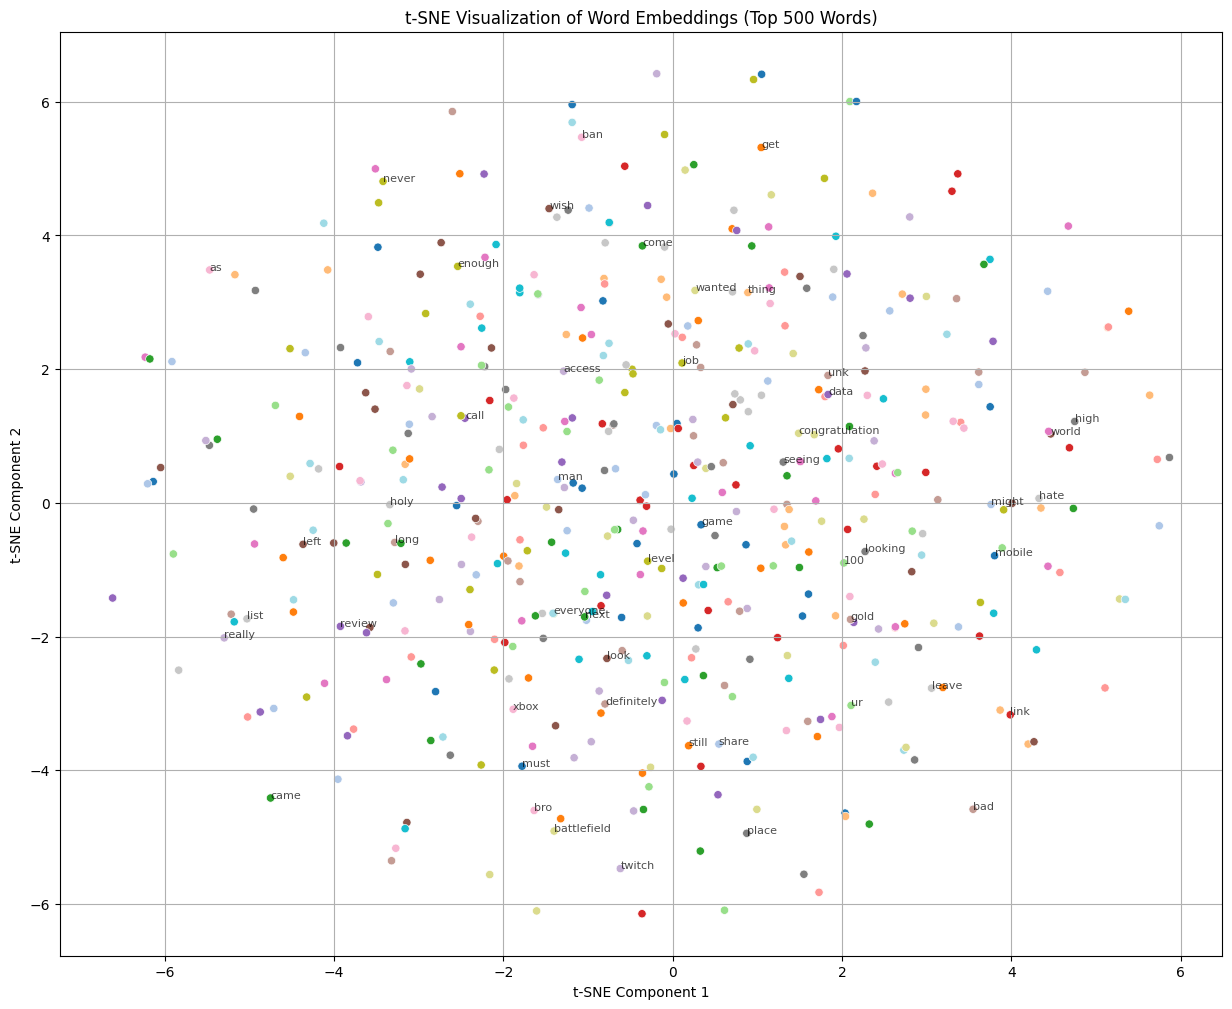

t-SNE visualization of word embeddings generated successfully.


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np

# 1. Retrieve word embeddings
# Move embeddings to CPU and convert to numpy array
word_embeddings = model.embedding.weight.data.cpu().numpy()
print(f"Shape of raw word embeddings: {word_embeddings.shape}")

# 2. Select a subset of embeddings for visualization (e.g., top 1000 most frequent words)
# The tokenizer's word_index is typically ordered by frequency.
# Let's consider words up to index 1000, excluding the padding (0) and <unk> (1) if present
# num_words_to_visualize = 1000
# Use all words for now, TSNE might take a while
# For performance, we can sample:

# Let's take the first 1000 words from the word_index for TSNE
# Exclude padding (0) and <unk> (1) if present in word_index, assuming word_index starts from 1 for <unk>
words_for_tsne = list(word_index.keys())[1:1001] # From <unk> (index 1) to the 1000th word
indices_for_tsne = [word_index[word] for word in words_for_tsne]

# Ensure indices are within the bounds of word_embeddings (which has vocabulary_size rows)
# Adjust indices to be 0-based if necessary, depending on how embedding layer was initialized
# The embedding layer automatically handles index 0 for padding. Our vocabulary_size is len(word_index) + 1
# If word_index starts from 1 (for <unk>), then actual embedding indices are 0 to len(word_index)
# If <unk> is index 1, then the word_index values are suitable for direct use with embedding layer outputs.
# Let's map word_index values to 0-based indexing for numpy array access
# The embedding layer usually maps word_index to embedding vector. So, if word 'game' is 2, it gets word_embeddings[2]
# We need to ensure we are taking the correct rows from word_embeddings

# Assuming word_index gives 1-based indexing for actual words, and 0 is reserved for padding.
# If word 'game' has index 2 in word_index, we access word_embeddings[2]
# So, the indices for TSNE are directly the values from word_index, up to a certain point.

selected_indices_for_tsne = []
selected_words = []

# Create a mapping from word to its index in word_index (1-based)
word_to_idx_map = {word: idx for word, idx in word_index.items()}

# Collect the actual indices and words for the top N most frequent words (excluding <unk> and padding)
# Assuming word_index is sorted by frequency (lower index = more frequent)
# We'll take words whose index in the tokenizer is between 2 and N+1 (inclusive) to skip <unk> and padding
num_words_to_visualize = 500
current_count = 0
for word, idx in word_index.items():
    if idx > 1 and current_count < num_words_to_visualize: # Exclude <unk> and padding (if any has index 0 or 1)
        selected_indices_for_tsne.append(idx)
        selected_words.append(word)
        current_count += 1
    if current_count >= num_words_to_visualize:
        break

# Select the actual embedding vectors using these indices
# Ensure the indices are valid for the word_embeddings array (which is 0-indexed and of size vocabulary_size)
# If `vocabulary_size` is `len(word_index) + 1`, and `word_index` starts from 1, then `word_embeddings[0]` is padding, `word_embeddings[1]` is <unk>, etc.
# So, `selected_indices_for_tsne` should directly correspond to rows in `word_embeddings`.

selected_embeddings = word_embeddings[selected_indices_for_tsne]
print(f"Shape of selected embeddings for TSNE: {selected_embeddings.shape}")

# 3. Apply TSNE for dimensionality reduction
# Perplexity should be less than the number of samples. Make sure it's valid.
perplexity_val = min(30, selected_embeddings.shape[0] - 1) # Default is 30, ensure it's not too large

tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_val, max_iter=2000) # Changed n_iter to max_iter
reduced_embeddings = tsne.fit_transform(selected_embeddings)

print("TSNE dimensionality reduction complete.")

# 4. Create a scatter plot
plt.figure(figsize=(15, 12))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=selected_words, legend=False, palette='tab20')

# Annotate some words (e.g., top 50 or random subset for clarity)
num_annotations = 50 # Number of words to annotate
np.random.seed(42) # For reproducibility
annotation_indices = np.random.choice(len(selected_words), num_annotations, replace=False)

for i in annotation_indices:
    plt.annotate(selected_words[i], (reduced_embeddings[i, 0], reduced_embeddings[i, 1]),
                 fontsize=8, alpha=0.7)

plt.title(f't-SNE Visualization of Word Embeddings (Top {num_words_to_visualize} Words)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

print("t-SNE visualization of word embeddings generated successfully.")

In [ ]:
import gradio as gr
import torch
import numpy as np
import matplotlib.pyplot as plt

# Install lime if not already installed
# !pip install lime > /dev/null

from lime.lime_text import LimeTextExplainer
from tensorflow.keras.layers import TextVectorization

print("Required libraries imported and lime installed successfully.")

Required libraries imported and lime installed successfully.


In [34]:
import torch.nn.functional as F

# Helper function to preprocess text for the LSTM model
def preprocess_for_model(text):
    if pd.isna(text) or text is None or text == "": # Handle NaN, None, or empty values
        return torch.LongTensor(np.zeros((1, max_sequence_length)))

    # Preprocess text using the existing function (lowercase, tokenize, remove stopwords, lemmatize)
    cleaned_text = preprocess_text(text)

    # Convert cleaned text to sequences of integers
    sequence = tokenizer.texts_to_sequences([cleaned_text])

    # Pad sequences to the fixed length
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length, padding='post')

    # Convert to PyTorch tensor
    return torch.LongTensor(padded_sequence)

# Prediction function for Gradio
def predict_sentiment(text):
    model.eval() # Set model to evaluation mode

    # Preprocess the input text
    input_tensor = preprocess_for_model(text).to(device)

    # Get model outputs (logits)
    with torch.no_grad():
        outputs = model(input_tensor)

    # Apply softmax to get probabilities
    probabilities = F.softmax(outputs, dim=1).cpu().numpy()[0]

    # Get predicted class index
    predicted_class_idx = np.argmax(probabilities)

    # Map index back to sentiment label
    # Invert the sentiment_mapping to get labels from indices
    inv_sentiment_mapping = {v: k for k, v in sentiment_mapping.items()}
    predicted_sentiment = inv_sentiment_mapping[predicted_class_idx]

    return predicted_sentiment, probabilities

print("Preprocessing and prediction functions defined successfully.")

Preprocessing and prediction functions defined successfully.


In [35]:
import matplotlib.pyplot as plt

# 4a. Define a predictor function for LIME
# LIME explainer expects a function that takes a list of raw texts and returns a numpy array of probabilities
def predictor_for_lime(texts):
    model.eval()
    processed_tensors = []
    for text in texts:
        processed_tensors.append(preprocess_for_model(text))

    # Concatenate all tensors and move to device
    input_batch = torch.cat(processed_tensors, dim=0).to(device)

    with torch.no_grad():
        outputs = model(input_batch)
    probabilities = F.softmax(outputs, dim=1).cpu().numpy()
    return probabilities

# 4b. Initialize LimeTextExplainer
inv_sentiment_mapping = {v: k for k, v in sentiment_mapping.items()}
class_names = [inv_sentiment_mapping[i] for i in sorted(inv_sentiment_mapping.keys())]
explainer = LimeTextExplainer(class_names=class_names)

# 4c. Define an explain_prediction function
def explain_prediction(text):
    if not text.strip(): # Handle empty input
        return "Please enter some text to explain."

    # Generate explanation for the input text
    explanation = explainer.explain_instance(
        text,
        predictor_for_lime,
        num_features=10,
        num_samples=500
    )

    # Get word-to-weight mapping
    word_weights = explanation.as_list()

    # Create an HTML string with highlighted words
    highlighted_text = text
    # Sort words by length in descending order to avoid issues with substrings
    word_weights.sort(key=lambda x: len(x[0]), reverse=True)

    # Define a simple color mapping for positive/negative influence
    # Adjust color intensity based on absolute weight
    for word, weight in word_weights:
        # Simple highlighting for now, can be made more sophisticated
        color = ''
        if weight > 0: # Positive influence
            color = f'rgba(0, 255, 0, {abs(weight)/max(1, max(abs(w) for _,w in word_weights))})' # Green
        elif weight < 0: # Negative influence
            color = f'rgba(255, 0, 0, {abs(weight)/max(1, max(abs(w) for _,w in word_weights))})' # Red

        if color: # Only if there's a weight to highlight
            # Use a regex to replace whole words only, case-insensitive
            highlighted_text = re.sub(r'\b' + re.escape(word) + r'\b',
                                    f"<span style='background-color:{color}'>{word}</span>",
                                    highlighted_text,
                                    flags=re.IGNORECASE)

    return f"<div><b>Explanation for:</b> {explanation.class_names[explanation.top_labels[0]]}</div><p>{highlighted_text}</p>"

# 5. Define a plot_probabilities function
def plot_probabilities(probabilities):
    # Invert sentiment mapping for plotting labels
    inv_sentiment_mapping = {v: k for k, v in sentiment_mapping.items()}
    labels = [inv_sentiment_mapping[i] for i in sorted(inv_sentiment_mapping.keys())]

    fig = plt.figure(figsize=(8, 4))
    plt.bar(labels, probabilities, color=['blue', 'red', 'green', 'purple'])
    plt.ylabel('Probability')
    plt.title('Sentiment Probability Distribution')
    plt.ylim(0, 1)
    plt.tight_layout()
    return fig

print("LIME explainer functions and probability plotting function defined successfully.")

LIME explainer functions and probability plotting function defined successfully.


In [36]:
import re

# Wrapper function for Gradio interface
def gradio_interface(text):
    predicted_sentiment, probabilities = predict_sentiment(text)
    prob_plot = plot_probabilities(probabilities)
    explanation_html = explain_prediction(text)

    return predicted_sentiment, prob_plot, explanation_html

# Create the Gradio interface
iface = gr.Interface(
    fn=gradio_interface,
    inputs=gr.Textbox(lines=5, label='Enter your tweet'),
    outputs=[
        gr.Textbox(label='Predicted Sentiment'),
        gr.Plot(label='Sentiment Probability Distribution'),
        gr.HTML(label='Explanation with Influential Words')
    ],
    title='Tweet Sentiment Analysis with Explanations',
    description='Enter a tweet to predict its sentiment (Positive, Negative, Neutral, Irrelevant) and see word-level explanations using LIME.',
    live=False
)

print("Launching Gradio interface...")
# Launch the interface
iface.launch(share=True)

print("Gradio interface launched successfully.")

Launching Gradio interface...
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://56db4f27f81ab4d9dd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Gradio interface launched successfully.


## Final Task

### Subtask:
Summarize the entire sentiment classification pipeline, present the performance of all models, highlight key findings from the visualizations, and discuss the overall solution and its components suitable for academic reporting.


## Summary:

### Data Analysis Key Findings

*   **Data Overview:** The dataset initially had column mislabeling, which was corrected. It contains 686 missing values in the `text` column. Sentiment distribution is imbalanced, with 'Negative' (22,808) and 'Positive' (21,109) being the most frequent, followed by 'Neutral' (18,603) and 'Irrelevant' (13,162).
*   **Text Preprocessing:** Text was successfully tokenized, stop words removed, and lemmatized. An NLTK `LookupError` for `punkt_tab` was resolved during this step.
*   **Feature Engineering:**
    *   Sentiment classes were mapped to numerical labels (0-3).
    *   **TF-IDF Vectorization** generated a feature matrix of shape (60545, 5000) for training and (15137, 5000) for testing, capturing important word features for baseline models.
    *   For deep learning, a vocabulary of 26,304 words was created, and text sequences were padded to a maximum length of 26.
*   **Baseline Model Performance (using TF-IDF features):**
    *   **Support Vector Machine (SVM)** achieved the best performance among baselines with an F1-Score of 0.7019 and Accuracy of 0.7039.
    *   **Logistic Regression** showed an F1-Score of 0.6705 and Accuracy of 0.6741.
    *   **Multinomial Naive Bayes** had the lowest performance with an F1-Score of 0.6230 and Accuracy of 0.6347.
*   **Deep Learning Model Performance (LSTM):**
    *   The PyTorch-based LSTM model significantly outperformed all baseline models, achieving a weighted F1-Score of 0.8482 and an Accuracy of 0.8481 on the test set.
    *   Analysis of training and validation curves indicated potential overfitting after approximately 7-8 epochs, where validation loss started to slightly increase while training performance continued to improve.
*   **Visualizations:**
    *   **Word Clouds** effectively displayed prevalent terms for each sentiment class.
    *   **Top TF-IDF Weighted Words** identified common and distinctive terms across the corpus.
    *   A **t-SNE visualization** successfully reduced and plotted 500 word embeddings, showing potential clusters of semantically similar words.
*   **Mathematical Reasoning:** The mathematical formulas for TF-IDF, Cross-Entropy Loss, Precision, Recall, and F1-Score were clearly presented.
*   **Interactive UI:** An interactive Gradio interface was developed, providing real-time sentiment prediction, probability distribution plots, and LIME-based word-level explanations for user-entered tweets.

### Insights or Next Steps

*   The LSTM model demonstrated superior performance for sentiment classification compared to traditional machine learning models, suggesting that the sequential nature of text data is effectively captured by deep learning architectures. Further hyperparameter tuning or regularization (e.g., early stopping based on validation loss) could mitigate the observed overfitting in the LSTM.
*   The interactive Gradio UI, coupled with LIME explanations, provides a valuable tool for understanding model predictions at a granular level. This interpretability is crucial for debugging, building trust in AI systems, and gaining deeper insights into what drives a particular sentiment.
